# **VACCINE SUPPLY AND LOGISTICS ANALYSIS**

Immunization is the process by which a person becomes protected against a disease through vaccination, 
while Vaccination is the act of introducing a vaccine into the body to produce protection against specific diseases. 
A vaccine is a preparation that is used to stimulate the body's immune response against diseases. 

Immunization is one of the most successful public health interventions. However, its coverage has plateaued over the last decade due to the COVID-19 Pandemic and associated disruptions, COVID-19 vaccinations strained health systems in 2020 and 2021 resulting in setbacks.


IMAGE: ![Image of vaccine supply and logistics](https://www.who.int/images/default-source/departments/immunization-ivb/supply-chain/vaccine_supply_chain.png?Status=Master&sfvrsn=90468335_16)

Succesful immunization programmes are built on functional, end-to-end supply chain and logistics systems.
These systems enable effective vaccine storage, distribution, handling and management, ensure rigorous temperature control 
in the cold chain; and leverage logistics management information systems to promote resillient and efficient system
performance. 

The World Health Organization(WHO) ensures uninterrupted availability of vaccines from the manufacturer to service 
delivery levels.

### **Objectives**

Perform SQL analysis using the: 
[Vaccine Supply and Logistics dataset](https://www.immunizationdata.who.int/global/wiise-detail-page/vaccine-supply-and-logistics?ISO_3_CODE=&YEAR=) 
To determine how the efficiency of the supply system despite the COVID-19 setback. 

This analysis would focus on data from 2019 to 2023 and would attempt to answer questions like: 
+ *Supply chain efficiency* 
+ *Disruption Patterns* 
+ *Inventory Management* 
+ *Demand and Supply* 
+ *Cold chain Management* 
+ *Policy and governance*

                                                                    

### **Import the neccessary Libraries**

In [1]:
!pip install sqlalchemy

In [2]:
!pip install ipython-sql pandas

##### **Load the sql magic module**

In [3]:
%reload_ext sql 

Load the pandas and sqlite3 libraries and establish a connection to vaccine_logistics.db

In [4]:
import openpyxl, csv, sqlite3 
import pandas as pd
from sqlalchemy import create_engine 
connection = sqlite3.connect("vaccine_logistics.db") 
cursor = connection.cursor()

In [5]:
%sql sqlite:///vaccine_logistics.db

'Connected: @vaccine_logistics.db'

##### **Use Pandas to laod the data in the link above to dataframes, and load the dataframes into the vaccine_logistics.db**

In [6]:
logistics = pd.read_excel("Vaccine_Supply_and_Logistics.xlsx") 
logistics

ISO_3_CODE COUNTRYNAME WHO_REGION    YEAR  \
0                               ABW       Aruba       AMRO  2023.0   
1                               ABW       Aruba       AMRO  2023.0   
2                               ABW       Aruba       AMRO  2023.0   
3                               ABW       Aruba       AMRO  2023.0   
4                               ABW       Aruba       AMRO  2023.0   
...                             ...         ...        ...     ...   
51808                           ZWE    Zimbabwe       AFRO  2019.0   
51809                           ZWE    Zimbabwe       AFRO  2019.0   
51810                           ZWE    Zimbabwe       AFRO  2019.0   
51811                           ZWE    Zimbabwe       AFRO  2019.0   
51812  Exported: 2024-20-6 21:6 UTC         NaN        NaN     NaN   

                                        INDCODE  \
0                             SUPPLY_ANYDIST_YF   
1                   SUPPLY_MGMT_SYSTEM_NATIONAL   
2      SUPPLY_MANAGMENT_DISCARDED_NATIONAL_RATE   
3                     SUPPLY_MGMT_SYSTEM_ADMIN2   
4                                  SUPPLY_MM_YF   
...                                         ...   
51808                          SUPPLY_MM_PCV_CV   
51809                          SUPPLY_CAUSE_BCG   
51810                      SUPPLY_NATIONAL_MMCV   
51811                       SUPPLY_NATIONAL_OPV   
51812                                       NaN   

                                             DESCRIPTION      INDCATCODE  \
0      Was there a vaccine stock-out at the district ...  VACCINE_SUPPLY   
1      What type of stock management system is in pla...  VACCINE_SUPPLY   
2      What is the closed-vial wastage rate for DTP-c...  VACCINE_SUPPLY   
3      What type of stock management system is in pla...  VACCINE_SUPPLY   
4      What was the duration of stock-out in months o...  VACCINE_SUPPLY   
...                                                  ...             ...   
51808  What was the duration of stock-out in months o...  VACCINE_SUPPLY   
51809  What was the cause of the national stock-out o...  VACCINE_SUPPLY   
51810  Was there a stock-out at the national level of...  VACCINE_SUPPLY   
51811  Was there a stock-out at the national level of...  VACCINE_SUPPLY   
51812                                                NaN             NaN   

                 INDCAT_DESCRIPTION  INDSORT               VALUE  
0      Vaccine supply and logistics   1068.0                 Yes  
1      Vaccine supply and logistics   1079.0  Electronic offline  
2      Vaccine supply and logistics   1078.0                   0  
3      Vaccine supply and logistics   1080.0         Paper-based  
4      Vaccine supply and logistics   1066.0                   3  
...                             ...      ...                 ...  
51808  Vaccine supply and logistics    959.0                 NaN  
51809  Vaccine supply and logistics    620.0                 NaN  
51810  Vaccine supply and logistics    926.0                  NR  
51811  Vaccine supply and logistics    938.0                 Yes  
51812                           NaN      NaN                 NaN  

[51813 rows x 10 columns]

##### **Check the shape of the dataframe, the columns available and the data types.**

In [7]:
logistics.shape

(51813, 10)

In [8]:
logistics.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'INDCODE',
       'DESCRIPTION', 'INDCATCODE', 'INDCAT_DESCRIPTION', 'INDSORT', 'VALUE'],
      dtype='object')

In [9]:
logistics.dtypes

ISO_3_CODE             object
COUNTRYNAME            object
WHO_REGION             object
YEAR                  float64
INDCODE                object
DESCRIPTION            object
INDCATCODE             object
INDCAT_DESCRIPTION     object
INDSORT               float64
VALUE                  object
dtype: object

In [10]:
logistics.isnull().sum()

ISO_3_CODE                0
COUNTRYNAME               1
WHO_REGION                1
YEAR                      1
INDCODE                   1
DESCRIPTION               1
INDCATCODE                1
INDCAT_DESCRIPTION        1
INDSORT                   1
VALUE                 22071
dtype: int64

In [11]:
logistics.to_sql("LOGISTICS", con=connection, if_exists="replace", index=False)

51813

In [12]:
%sql sqlite:///vaccine_logistics.db 
result = %sql SELECT * FROM Logistics 

 * sqlite:///vaccine_logistics.db
Done.


+ **Display the unique years in the dataframe**

In [13]:
%sql SELECT distinct YEAR FROM LOGISTICS

 * sqlite:///vaccine_logistics.db
Done.


[(2023.0,), (2022.0,), (2021.0,), (2020.0,), (2019.0,), (None,)]

+ **Display the Countries**

In [14]:
%sql SELECT distinct COUNTRYNAME FROM LOGISTICS

 * sqlite:///vaccine_logistics.db
Done.


[('Aruba',),
 ('Afghanistan',),
 ('Angola',),
 ('Anguilla',),
 ('Albania',),
 ('Andorra',),
 ('United Arab Emirates',),
 ('Argentina',),
 ('Armenia',),
 ('Antigua and Barbuda',),
 ('Australia',),
 ('Austria',),
 ('Azerbaijan',),
 ('Belgium',),
 ('Benin',),
 ('Burkina Faso',),
 ('Bangladesh',),
 ('Bulgaria',),
 ('Bahrain',),
 ('Bahamas',),
 ('Belarus',),
 ('Belize',),
 ('Bermuda',),
 ('Bolivia (Plurinational State of)',),
 ('Brazil',),
 ('Barbados',),
 ('Brunei Darussalam',),
 ('Bhutan',),
 ('Botswana',),
 ('Central African Republic',),
 ('Canada',),
 ('Chile',),
 ('China',),
 ("Côte d'Ivoire",),
 ('Cameroon',),
 ('Democratic Republic of the Congo',),
 ('Congo',),
 ('Cook Islands',),
 ('Colombia',),
 ('Comoros',),
 ('Cabo Verde',),
 ('Costa Rica',),
 ('Cuba',),
 ('Cayman Islands',),
 ('Cyprus',),
 ('Czechia',),
 ('Djibouti',),
 ('Dominica',),
 ('Denmark',),
 ('Dominican Republic',),
 ('Algeria',),
 ('Ecuador',),
 ('Egypt',),
 ('Eritrea',),
 ('Spain',),
 ('Estonia',),
 ('Ethiopia',),
 ('Finland',),
 ('Fiji',),
 ('France',),
 ('Micronesia (Federated States of)',),
 ('Gabon',),
 ('United Kingdom of Great Britain and Northern Ireland',),
 ('Georgia',),
 ('Ghana',),
 ('Guinea',),
 ('Gambia',),
 ('Guinea-Bissau',),
 ('Equatorial Guinea',),
 ('Greece',),
 ('Grenada',),
 ('Guatemala',),
 ('Guam',),
 ('Guyana',),
 ('China, Hong Kong SAR',),
 ('Honduras',),
 ('Croatia',),
 ('Haiti',),
 ('Hungary',),
 ('Indonesia',),
 ('Ireland',),
 ('Iran (Islamic Republic of)',),
 ('Iraq',),
 ('Iceland',),
 ('Jamaica',),
 ('Jordan',),
 ('Japan',),
 ('Kazakhstan',),
 ('Kenya',),
 ('Kyrgyzstan',),
 ('Cambodia',),
 ('Kiribati',),
 ('Saint Kitts and Nevis',),
 ('Republic of Korea',),
 ('Kuwait',),
 ("Lao People's Democratic Republic",),
 ('Lebanon',),
 ('Liberia',),
 ('Libya',),
 ('Saint Lucia',),
 ('Sri Lanka',),
 ('Lesotho',),
 ('Lithuania',),
 ('Luxembourg',),
 ('Latvia',),
 ('China, Macao SAR',),
 ('Monaco',),
 ('Republic of Moldova',),
 ('Madagascar',),
 ('Maldives',),
 ('Mexico',),
 ('Marshall Islands',),
 ('North Macedonia',),
 ('Mali',),
 ('Malta',),
 ('Myanmar',),
 ('Montenegro',),
 ('Mongolia',),
 ('Northern Mariana Islands',),
 ('Mozambique',),
 ('Mauritania',),
 ('Montserrat',),
 ('Mauritius',),
 ('Malawi',),
 ('Malaysia',),
 ('Namibia',),
 ('New Caledonia',),
 ('Niger',),
 ('Nigeria',),
 ('Nicaragua',),
 ('Niue',),
 ('Netherlands (Kingdom of the)',),
 ('Norway',),
 ('Nepal',),
 ('New Zealand',),
 ('Oman',),
 ('Pakistan',),
 ('Peru',),
 ('Philippines',),
 ('Palau',),
 ('Papua New Guinea',),
 ("Democratic People's Republic of Korea",),
 ('Portugal',),
 ('Paraguay',),
 ('occupied Palestinian territory, including east Jerusalem',),
 ('French Polynesia',),
 ('Qatar',),
 ('Romania',),
 ('Russian Federation',),
 ('Rwanda',),
 ('Saudi Arabia',),
 ('Sudan',),
 ('Senegal',),
 ('Singapore',),
 ('Solomon Islands',),
 ('Sierra Leone',),
 ('El Salvador',),
 ('San Marino',),
 ('Somalia',),
 ('Serbia',),
 ('South Sudan',),
 ('Sao Tome and Principe',),
 ('Suriname',),
 ('Slovakia',),
 ('Slovenia',),
 ('Sweden',),
 ('Eswatini',),
 ('Seychelles',),
 ('Syrian Arab Republic',),
 ('Turks and Caicos Islands',),
 ('Chad',),
 ('Togo',),
 ('Thailand',),
 ('Tajikistan',),
 ('Tokelau',),
 ('Turkmenistan',),
 ('Timor-Leste',),
 ('Tonga',),
 ('Trinidad and Tobago',),
 ('Tunisia',),
 ('Tuvalu',),
 ('United Republic of Tanzania',),
 ('Uganda',),
 ('Ukraine',),
 ('Uruguay',),
 ('United States of America',),
 ('Uzbekistan',),
 ('Saint Vincent and the Grenadines',),
 ('Venezuela (Bolivarian Republic of)',),
 ('British Virgin Islands',),
 ('Viet Nam',),
 ('Vanuatu',),
 ('Samoa',),
 ('Yemen',),
 ('South Africa',),
 ('Zambia',),
 ('Zimbabwe',),
 ('Burundi',),
 ('Bosnia and Herzegovina',),
 ('Switzerland',),
 ('India',),
 ('Israel',),
 ('Italy',),
 ('Nauru',),
 ('Panama',),
 ('Poland',),
 ('Türkiye',),
 ('Kosovo (in accordance with UN Security Council resolution 1244 (1999))',),
 ('Germany',),
 ('Curaçao',),
 ('Morocco',),
 ('Wallis and Futuna',),
 (None,)]

+ **Display distinct regions included in the vaccine dataframe**

In [15]:
%sql SELECT distinct WHO_REGION FROM LOGISTICS

 * sqlite:///vaccine_logistics.db
Done.


[('AMRO',), ('EMRO',), ('AFRO',), ('EURO',), ('WPRO',), ('SEARO',), (None,)]

+ **The Description column describes the actions needed and taken for vaccine supply**

In [16]:
%sql SELECT distinct DESCRIPTION FROM LOGISTICS

 * sqlite:///vaccine_logistics.db
Done.


[('Was there a vaccine stock-out at the district level of YF (Yellow fever) vaccine?',),
 ('What type of stock management system is in place at the national level?',),
 ('What is the closed-vial wastage rate for DTP-containing vaccine at the national level?',),
 ('What type of stock management system is in place at the 2nd administrative level?',),
 ('What was the duration of stock-out in months of YF (Yellow fever) vaccine?',),
 ('Was there a stock-out of home-based vaccination records for children and/or women (i.e. no remaining home-based records for any period of time) at the national level?',),
 ('Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?',),
 ('What type of stock management system is in place at the 3rd administrative level?',),
 ('What was the cause of the national stock-out of YF (Yellow fever) vaccine?',),
 ('What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?',),
 ('What type of stock management system is in place at the health facility level?',),
 ('Was there a stock-out at the national level of YF (Yellow fever) vaccine?',),
 ('Was there a vaccine stock-out?',),
 ('Was there a stock-out at the national level of IPV (Inactivated polio vaccine)?',),
 ('Was there a vaccine stock-out at the district level of BCG (Baccille Calmette Guérin) vaccine?',),
 ('Was there a vaccine stock-out at the district level of RV-1 (Rotavirus 1-valent) vaccine?',),
 ('What was the cause of the national stock-out of MR (Measles and rubella) vaccine?',),
 ('What was the duration of stock-out in months of PCV-13 (Pneumococcal conjugate vaccine 13-valent) vaccine?',),
 ('What was the cause of the national stock-out of DTwP-Hib-HepB (Whole cell) vaccine?',),
 ('What was the duration of stock-out in months of Pediatric Hepatitis B vaccine?',),
 ('What was the duration of stock-out in months of IPV (Inactivated polio vaccine)?',),
 ('Was there a stock-out at the national level of RV-1 (Rotavirus 1-valent) vaccine?',),
 ('What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?',),
 ('Was there a vaccine stock-out at the district level of PCV-13 (Pneumococcal conjugate vaccine 13-valent) vaccine?',),
 ('Was there a vaccine stock-out at the district level of Td (Tetanus toxoid and diphtheria for older children and adults) vaccine?',),
 ('What was the cause of the national stock-out of OPV (Oral polio vaccine)?',),
 ('What was the cause of the national stock-out of RV-1 (Rotavirus 1-valent) vaccine?',),
 ('Was there a stock-out at the national level of MR (Measles and rubella) vaccine?',),
 ('Was there a stock-out at the national level of PCV-13 (Pneumococcal conjugate vaccine 13-valent) vaccine?',),
 ('Was there a stock-out at the national level of BCG (Baccille Calmette Guérin) vaccine?',),
 ('Was there a stock-out at the national level of Pediatric Hepatitis B vaccine?',),
 ('Was there a vaccine stock-out at the district level of MR (Measles and rubella) vaccine?',),
 ('Was there a vaccine stock-out at the district level of Pediatric Hepatitis B vaccine?',),
 ('Was there a vaccine stock-out at the district level of OPV (Oral polio vaccine)?',),
 ('What was the cause of the national stock-out of PCV-13 (Pneumococcal conjugate vaccine 13-valent) vaccine?',),
 ('What was the duration of stock-out in months of MR (Measles and rubella) vaccine?',),
 ('What was the duration of stock-out in months of Td (Tetanus toxoid and diphtheria for older children and adults) vaccine?',),
 ('Was there a stock-out at the national level of OPV (Oral polio vaccine)?',),
 ('What was the cause of the national stock-out of Pediatric Hepatitis B vaccine?',),
 ('What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?',),
 ('What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?',),
 ('What was the duration of stock-out 

### **SUPPLY CHAIN EFFICIENCY** 
**1. Are there any significant delays in vaccine delivery to different regions?**

In [17]:
delays = %sql SELECT YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE, count(*) as Frequency FROM LOGISTICS WHERE VALUE like "%delay%" GROUP BY YEAR,COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE ORDER BY YEAR; 
delays

 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'Anguilla', 'AMRO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'Anguilla', 'AMRO', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Procurement delays', 1),
 (2019.0, 'Antigua and Barbuda', 'AMRO', 'What was the cause of the national stock-out of Yellow fever vaccine?', 'Funding delays', 1),
 (2019.0, 'Argentina', 'AMRO', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Procurement delays', 1),
 (2019.0, 'Aruba', 'AMRO', 'What was the cause of the national stock-out of Pneumococcal conjugate vaccines?', 'Procurement delays', 1),
 (2019.0, 'Barbados', 'AMRO', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Procurement delays', 1),
 (2019.0, 'Belgium', 'EURO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'Benin', 'AFRO', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'Benin', 'AFRO', 'What was the cause of the national stock-out of Haemophilus influenzae type B (hib) monovalent vaccines?', 'Procurement delays', 1),
 (2019.0, 'Benin', 'AFRO', 'What was the cause of the national stock-out of Pneumococcal conjugate vaccines?', 'Procurement delays', 1),
 (2019.0, 'Bermuda', 'AMRO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'Bermuda', 'AMRO', 'What was the cause of the national stock-out of Meningococcal meningitis vaccines (all strains)?', 'Procurement delays', 1),
 (2019.0, 'Bhutan', 'SEARO', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Funding delays', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Funding delays', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'What was the cause of the national stock-out of Haemophilus influenzae type B (hib) monovalent vaccines?', 'Funding delays', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Funding delays', 1),
 (2019.0, 'Botswana', 'AFRO', 'What was the cause of the national stock-out of Rotavirus vaccine?', 'Procurement delays', 1),
 (2019.0, 'Botswana', 'AFRO', 'What was the cause of the national stock-out of TT / DT / Td containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'British Virgin Islands', 'AMRO', 'What was the cause of the national stock-out of Auto-disable syringes?', 'Procurement delays', 1),
 (2019.0, 'Burkina Faso', 'AFRO', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Procurement delays', 1),
 (2019.0, 'Burkina Faso', 'AFRO', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Funding delays', 1),
 (2019.0, 'Cambodia', 'WPRO', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Funding delays', 1),
 (2019.0, 'Cambodia', 'WPRO', 'What was the cause of the national stock-out of Hepatitis B monovalent vaccines?', 'Funding delays', 1),
 (2019.0, 'Cambodia', 'WPRO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Funding delays', 1),
 (2019.0, 'Cambodia', 'WPRO', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Funding delays', 1),
 (2019.0, 'Central African Republic', 'AFRO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Procurement delays', 1),
 (2019.0, 'Central African Republic', 'AFRO', 'What was the cause of the national stock-out of Yellow fever vaccine?', 'Funding delays', 1),
 (2019.0, 'Chad', 'AFRO', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Funding delays', 1),
 (2019.0, 'Chad', 'AFRO', 'What wa

In [18]:
import matplotlib.pyplot as plt

In [19]:
df = pd.DataFrame(delays) 
df

0                    1     2  \
0    2019.0             Anguilla  AMRO   
1    2019.0             Anguilla  AMRO   
2    2019.0  Antigua and Barbuda  AMRO   
3    2019.0            Argentina  AMRO   
4    2019.0                Aruba  AMRO   
..      ...                  ...   ...   
672  2023.0             Viet Nam  WPRO   
673  2023.0             Viet Nam  WPRO   
674  2023.0             Viet Nam  WPRO   
675  2023.0             Viet Nam  WPRO   
676  2023.0               Zambia  AFRO   

                                                     3                   4  5  
0    What was the cause of the national stock-out o...  Procurement delays  1  
1    What was the cause of the national stock-out o...  Procurement delays  1  
2    What was the cause of the national stock-out o...      Funding delays  1  
3    What was the cause of the national stock-out o...  Procurement delays  1  
4    What was the cause of the national stock-out o...  Procurement delays  1  
..                                                 ...                 ... ..  
672  What was the cause of the national stock-out o...      Funding delays  1  
673  What was the cause of the national stock-out o...      Funding delays  1  
674  What was the cause of the national stock-out o...      Funding delays  1  
675  What was the cause of the national stock-out o...      Funding delays  1  
676  What was the cause of the national stock-out o...      Funding delays  1  

[677 rows x 6 columns]

In [20]:
df.columns = ["YEAR", "COUNTRYNAME", "WHO_REGION", "DESCRIPTION", "VALUE", "Frequency"]

In [21]:
df.head()

YEAR          COUNTRYNAME WHO_REGION  \
0  2019.0             Anguilla       AMRO   
1  2019.0             Anguilla       AMRO   
2  2019.0  Antigua and Barbuda       AMRO   
3  2019.0            Argentina       AMRO   
4  2019.0                Aruba       AMRO   

                                         DESCRIPTION               VALUE  \
0  What was the cause of the national stock-out o...  Procurement delays   
1  What was the cause of the national stock-out o...  Procurement delays   
2  What was the cause of the national stock-out o...      Funding delays   
3  What was the cause of the national stock-out o...  Procurement delays   
4  What was the cause of the national stock-out o...  Procurement delays   

   Frequency  
0          1  
1          1  
2          1  
3          1  
4          1

In [22]:
df["YEAR"] = df["YEAR"].astype(int)

In [23]:
pivot_df = df.pivot_table(index="YEAR", 
                          columns = "WHO_REGION", 
                          values = "Frequency", aggfunc="sum", fill_value=0)

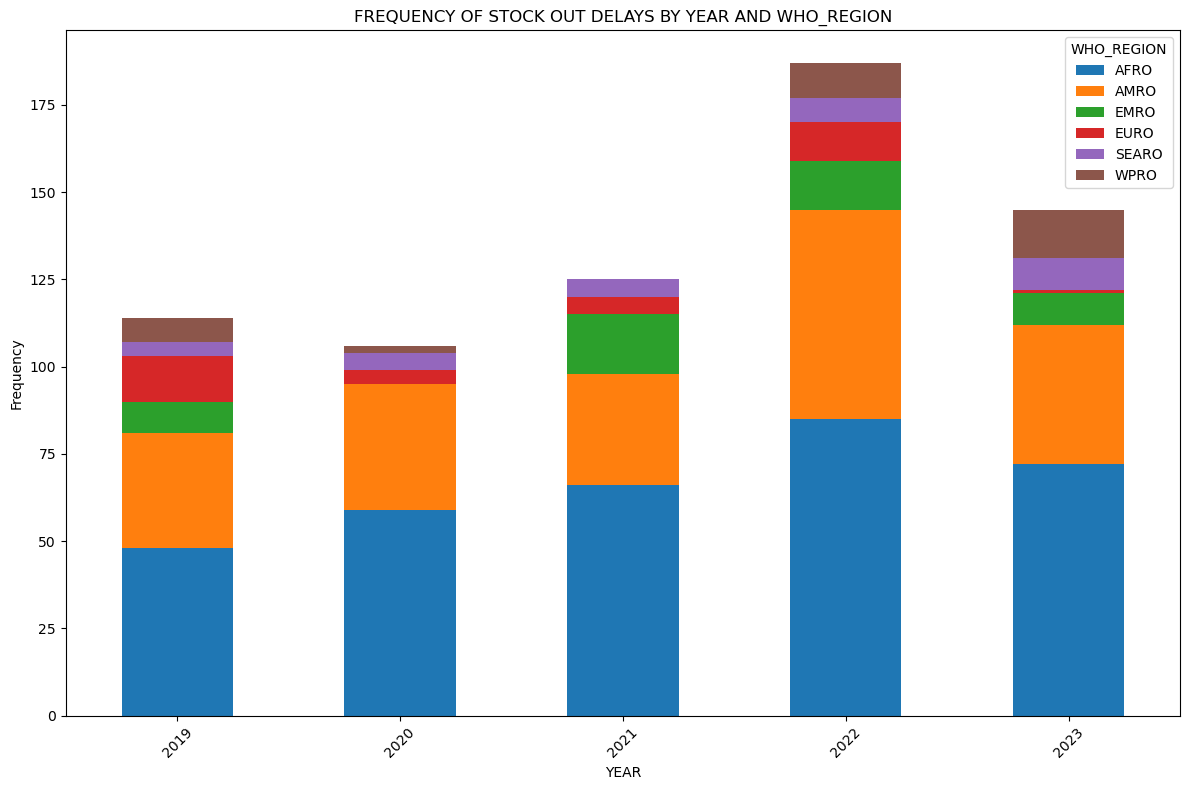

In [24]:
pivot_df.plot(kind="bar", 
              stacked=True, 
              figsize=(12, 8)) 
plt.xlabel("YEAR") 
plt.ylabel("Frequency") 
plt.title("FREQUENCY OF STOCK OUT DELAYS BY YEAR AND WHO_REGION") 
plt.legend(title="WHO_REGION") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()
              

This result indicates that African region suffers the most significant delays to vaccine availability.
From the data set these delays are actually caused by procurement delays or financial delays. 
The most significant increase in delays is seen in 2022 and can be noted to be high in all regions.

**2. What are the most common causes of supply chain disruptions?**

In [25]:
%sql SELECT VALUE, count(*) as Frequency FROM LOGISTICS WHERE DESCRIPTION LIKE "%national stock-out%" GROUP BY VALUE

 * sqlite:///vaccine_logistics.db
Done.


[(None, 7587),
 ('Cold chain issues', 23),
 ('Distribution issues', 22),
 ('Funding delays', 279),
 ('Global vaccine shortage', 1),
 ('Inaccurate forecasts', 24),
 ('ND', 381),
 ('NR', 3022),
 ('NRA lot release', 5),
 ('No', 8),
 ('Other/Not identified/Not known', 97),
 ('Procurement delays', 398),
 ('Quality issue on the vaccine', 17),
 ('Shortage', 122),
 ('Stock management issues', 18)]

From the result of the query above, it shows that the most common causes of supply chain 
disruptions are procurement delays and financial delays.

### **DISTRIBUTION PATTERNS** 
**1. Are there any regions with consistently low vaccine supply?**

In [26]:
query = """ 
SELECT YEAR, COUNTRYNAME, WHO_REGION, INDCODE, DESCRIPTION, VALUE, count(*) as Frequency 
FROM LOGISTICS WHERE VALUE LIKE "%Shortage%" 
GROUP BY YEAR, COUNTRYNAME, WHO_REGION, INDCODE, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
shortage = %sql $query 
shortage


 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'Angola', 'AFRO', 'SUPPLY_CAUSE_IPV', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Shortage', 1),
 (2019.0, 'Argentina', 'AMRO', 'SUPPLY_CAUSE_MMCV', 'What was the cause of the national stock-out of Meningococcal meningitis vaccines (all strains)?', 'Shortage', 1),
 (2019.0, 'Bahrain', 'EMRO', 'SUPPLY_CAUSE_DTPCV', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Shortage', 1),
 (2019.0, 'Bahrain', 'EMRO', 'SUPPLY_CAUSE_TT_DT_TD_CV', 'What was the cause of the national stock-out of TT / DT / Td containing vaccines?', 'Shortage', 1),
 (2019.0, 'Bahrain', 'EMRO', 'SUPPLY_CAUSE_TYPHOID', 'What was the cause of the national stock-out of Typhoid vaccine?', 'Shortage', 1),
 (2019.0, 'Bahrain', 'EMRO', 'SUPPLY_CAUSE_YFV', 'What was the cause of the national stock-out of Yellow fever vaccine?', 'Shortage', 1),
 (2019.0, 'Belize', 'AMRO', 'SUPPLY_CAUSE_HPV_CV', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Shortage', 1),
 (2019.0, 'Bermuda', 'AMRO', 'SUPPLY_CAUSE_HIB_MONO', 'What was the cause of the national stock-out of Haemophilus influenzae type B (hib) monovalent vaccines?', 'Shortage', 1),
 (2019.0, 'Bermuda', 'AMRO', 'SUPPLY_CAUSE_OTHER', 'What was the cause of the national stock-out of Other vaccine?', 'Shortage', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'SUPPLY_CAUSE_BCG', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Shortage', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'SUPPLY_CAUSE_MEASLES_CV', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Shortage', 1),
 (2019.0, 'Bosnia and Herzegovina', 'EURO', 'SUPPLY_CAUSE_OPV', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Shortage', 1),
 (2019.0, 'Burkina Faso', 'AFRO', 'SUPPLY_CAUSE_ROTAVIRUS', 'What was the cause of the national stock-out of Rotavirus vaccine?', 'Global vaccine shortage', 1),
 (2019.0, 'Central African Republic', 'AFRO', 'SUPPLY_CAUSE_IPV', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Shortage', 1),
 (2019.0, 'Cook Islands', 'WPRO', 'SUPPLY_CAUSE_HPV_CV', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Shortage', 1),
 (2019.0, 'Cuba', 'AMRO', 'SUPPLY_CAUSE_IPV', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Shortage', 1),
 (2019.0, 'Cyprus', 'EURO', 'SUPPLY_CAUSE_DTPCV', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Shortage', 1),
 (2019.0, 'Egypt', 'EMRO', 'SUPPLY_CAUSE_HIB_MONO', 'What was the cause of the national stock-out of Haemophilus influenzae type B (hib) monovalent vaccines?', 'Shortage', 1),
 (2019.0, 'Egypt', 'EMRO', 'SUPPLY_CAUSE_MMCV', 'What was the cause of the national stock-out of Meningococcal meningitis vaccines (all strains)?', 'Shortage', 1),
 (2019.0, 'Estonia', 'EURO', 'SUPPLY_CAUSE_DTPCV', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Shortage', 1),
 (2019.0, 'Iran (Islamic Republic of)', 'EMRO', 'SUPPLY_CAUSE_IPV', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Shortage', 1),
 (2019.0, 'Malta', 'EURO', 'SUPPLY_CAUSE_HEPB_MONO', 'What was the cause of the national stock-out of Hepatitis B monovalent vaccines?', 'Shortage', 1),
 (2019.0, 'Marshall Islands', 'WPRO', 'SUPPLY_CAUSE_HEPB_MONO', 'What was the cause of the national stock-out of Hepatitis B monovalent vaccines?', 'Shortage', 1),
 (2019.0, 'Mexico', 'AMRO', 'SUPPLY_CAUSE_BCG', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Shortage', 1),
 (2019.0, 'Mexico', 'AMRO', 'SUPPLY_CAUSE_DTPCV', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Shortage', 1),
 (2019.0, 'Mexico', 'AMRO', 'SUPPLY_CAUSE_HEPB_MONO', 'What was the cause of the national stoc

In [27]:
df2 = pd.DataFrame(shortage) 
df2

0           1      2                              3  \
0    2019.0      Angola   AFRO               SUPPLY_CAUSE_IPV   
1    2019.0   Argentina   AMRO              SUPPLY_CAUSE_MMCV   
2    2019.0     Bahrain   EMRO             SUPPLY_CAUSE_DTPCV   
3    2019.0     Bahrain   EMRO       SUPPLY_CAUSE_TT_DT_TD_CV   
4    2019.0     Bahrain   EMRO           SUPPLY_CAUSE_TYPHOID   
..      ...         ...    ...                            ...   
118  2023.0  Montenegro   EURO    SUPPLY_CAUSE_HEPB_PEDIATRIC   
119  2023.0  Montenegro   EURO  SUPPLY_CAUSE_MEN_ACYW_135CONJ   
120  2023.0  Montenegro   EURO              SUPPLY_CAUSE_TD_S   
121  2023.0     Myanmar  SEARO        SUPPLY_CAUSE_JE_LIVEATD   
122  2023.0     Nigeria   AFRO        SUPPLY_CAUSE_MEN_A_CONJ   

                                                     4         5  6  
0    What was the cause of the national stock-out o...  Shortage  1  
1    What was the cause of the national stock-out o...  Shortage  1  
2    What was the cause of the national stock-out o...  Shortage  1  
3    What was the cause of the national stock-out o...  Shortage  1  
4    What was the cause of the national stock-out o...  Shortage  1  
..                                                 ...       ... ..  
118  What was the cause of the national stock-out o...  Shortage  1  
119  What was the cause of the national stock-out o...  Shortage  1  
120  What was the cause of the national stock-out o...  Shortage  1  
121  What was the cause of the national stock-out o...  Shortage  1  
122  What was the cause of the national stock-out o...  Shortage  1  

[123 rows x 7 columns]

In [28]:
df2.columns =["YEAR", "COUNTRYNAME", "WHO_REGION", "INDCODE", "DESCRIPTION", "VALUE", "Frequency"]

In [29]:
print(df2)

       YEAR COUNTRYNAME WHO_REGION                        INDCODE  \
0    2019.0      Angola       AFRO               SUPPLY_CAUSE_IPV   
1    2019.0   Argentina       AMRO              SUPPLY_CAUSE_MMCV   
2    2019.0     Bahrain       EMRO             SUPPLY_CAUSE_DTPCV   
3    2019.0     Bahrain       EMRO       SUPPLY_CAUSE_TT_DT_TD_CV   
4    2019.0     Bahrain       EMRO           SUPPLY_CAUSE_TYPHOID   
..      ...         ...        ...                            ...   
118  2023.0  Montenegro       EURO    SUPPLY_CAUSE_HEPB_PEDIATRIC   
119  2023.0  Montenegro       EURO  SUPPLY_CAUSE_MEN_ACYW_135CONJ   
120  2023.0  Montenegro       EURO              SUPPLY_CAUSE_TD_S   
121  2023.0     Myanmar      SEARO        SUPPLY_CAUSE_JE_LIVEATD   
122  2023.0     Nigeria       AFRO        SUPPLY_CAUSE_MEN_A_CONJ   

                                           DESCRIPTION     VALUE  Frequency  
0    What was the cause of the national stock-out o...  Shortage          1  
1    What was t

In [30]:
df2["YEAR"] = df2["YEAR"].astype(int) 
print("Unique years in df2:")
print(df["YEAR"].unique()) 
print("\nRows with YEAR = 2023:") 
print(df2[df2["YEAR"] == 2023])

Unique years in df2:
[2019 2020 2021 2022 2023]

Rows with YEAR = 2023:
     YEAR                       COUNTRYNAME WHO_REGION  \
106  2023                        Bangladesh      SEARO   
107  2023                 Brunei Darussalam       WPRO   
108  2023                 Brunei Darussalam       WPRO   
109  2023                 Brunei Darussalam       WPRO   
110  2023                 Brunei Darussalam       WPRO   
111  2023                 Brunei Darussalam       WPRO   
112  2023                 Brunei Darussalam       WPRO   
113  2023                          Cameroon       AFRO   
114  2023  Democratic Republic of the Congo       AFRO   
115  2023                           Jamaica       AMRO   
116  2023                             Kenya       AFRO   
117  2023                        Montenegro       EURO   
118  2023                        Montenegro       EURO   
119  2023                        Montenegro       EURO   
120  2023                        Montenegro       EURO   


In [31]:
pivot_df2 = df2.pivot_table(index="YEAR",  
                            columns = "WHO_REGION", 
                            values = "Frequency", aggfunc = "sum", fill_value=0) 
print(pivot_df2)

WHO_REGION  AFRO  AMRO  EMRO  EURO  SEARO  WPRO
YEAR                                           
2019           5    14     7     9      2     3
2020           1     2     4     7      1     5
2021           8     2     4     4      1     1
2022           7     2     3    12      0     2
2023           4     1     0     4      2     6


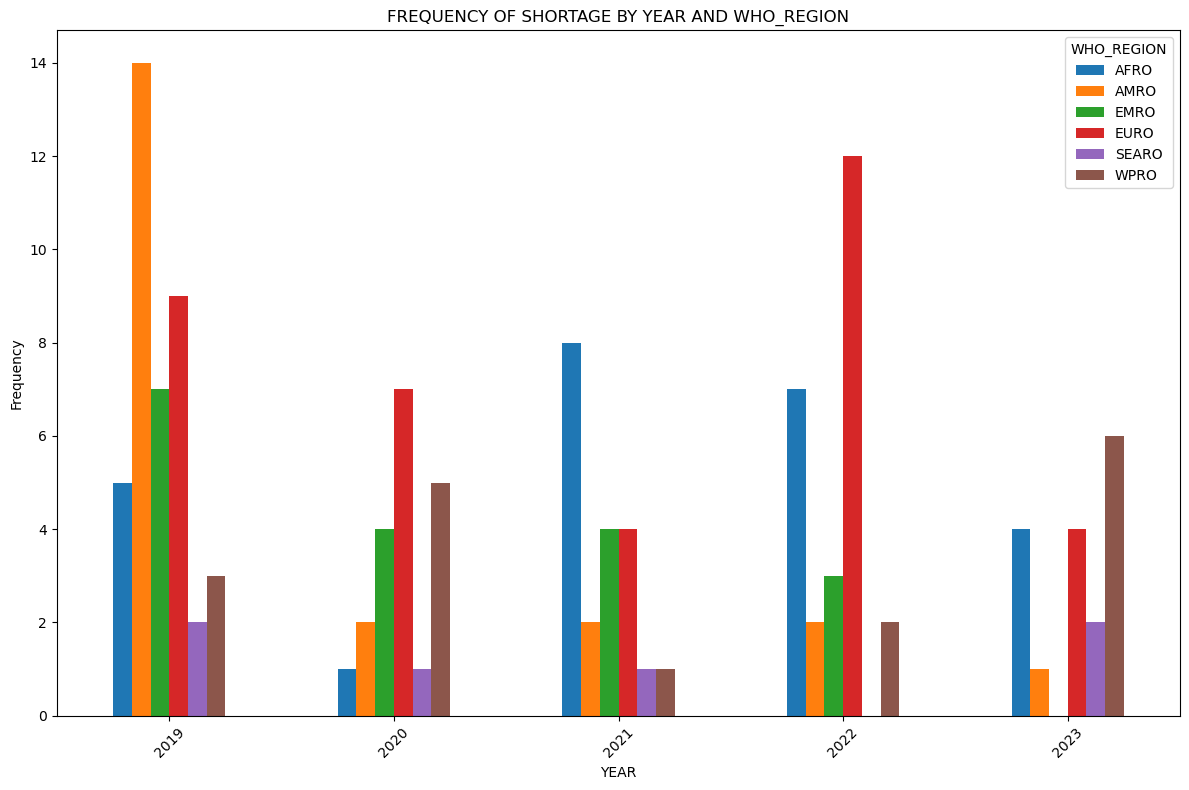

In [32]:
pivot_df2.plot(kind="bar",
               stacked=False, 
               figsize=(12, 8)) 
plt.xlabel("YEAR") 
plt.ylabel("Frequency") 
plt.title("FREQUENCY OF SHORTAGE BY YEAR AND WHO_REGION") 
plt.legend(title="WHO_REGION") 
plt.xticks(rotation = 45) 
plt.tight_layout() 
plt.show()

The bar chart show that shortages were recorded the most in the American regions in 2019 
and the most in 2022 for the European regions. However, in 2023, there seems to be a decline indicating a 
reduction in regions with shortages.

### **INVENTORY MANAGEMENT** 
**1. What is the inventory management system of vaccines at various storage points?**

In [33]:
query = """
SELECT COUNTRYNAME, WHO_REGION, DESCRIPTION, INDCODE, VALUE, count(*) as Frequency 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%stock management%" 
GROUP BY COUNTRYNAME, WHO_REGION, DESCRIPTION, INDCODE, VALUE
ORDER BY COUNTRYNAME;
""" 
inventory = %sql $query 
inventory

 * sqlite:///vaccine_logistics.db
Done.


[('Afghanistan', 'EMRO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'Electronic offline', 1),
 ('Afghanistan', 'EMRO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'Electronic offline', 1),
 ('Afghanistan', 'EMRO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', 'Paper-based', 1),
 ('Afghanistan', 'EMRO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', 'Electronic offline', 1),
 ('Albania', 'EURO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', None, 1),
 ('Albania', 'EURO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', None, 1),
 ('Albania', 'EURO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', None, 1),
 ('Albania', 'EURO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', None, 1),
 ('Algeria', 'AFRO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'Electronic offline', 1),
 ('Algeria', 'AFRO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'Electronic offline', 1),
 ('Algeria', 'AFRO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', 'Electronic offline', 1),
 ('Algeria', 'AFRO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', 'Electronic offline', 1),
 ('Andorra', 'EURO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'NR', 1),
 ('Andorra', 'EURO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'NR', 1),
 ('Andorra', 'EURO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', 'NR', 1),
 ('Andorra', 'EURO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', 'Electronic online', 1),
 ('Angola', 'AFRO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'Electronic online', 1),
 ('Angola', 'AFRO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'Electronic online', 1),
 ('Angola', 'AFRO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', 'Paper-based', 1),
 ('Angola', 'AFRO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', 'Electronic online', 1),
 ('Anguilla', 'AMRO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'Paper-based', 1),
 ('Anguilla', 'AMRO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'Paper-based', 1),
 ('Anguilla', 'AMRO', 'What type of stock management system is in place at the health facility level?', 'SUPPLY_MGMT_SYSTEM_HF', 'Paper-based', 1),
 ('Anguilla', 'AMRO', 'What type of stock management system is in place at the national level?', 'SUPPLY_MGMT_SYSTEM_NATIONAL', 'Paper-based', 1),
 ('Antigua and Barbuda', 'AMRO', 'What type of stock management system is in place at the 2nd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN2', 'Paper-based', 1),
 ('Antigua and Barbuda', 'AMRO', 'What type of stock management system is in place at the 3rd administrative level?', 'SUPPLY_MGMT_SYSTEM_ADMIN3', 'Paper-based', 1),
 ('Antigua and Barbuda', 'AMRO', 'Wh

In [34]:
df3 = pd.DataFrame(inventory) 
df3

0     1  \
0                                          Afghanistan  EMRO   
1                                          Afghanistan  EMRO   
2                                          Afghanistan  EMRO   
3                                          Afghanistan  EMRO   
4                                              Albania  EURO   
..                                                 ...   ...   
783                                           Zimbabwe  AFRO   
784  occupied Palestinian territory, including east...  EMRO   
785  occupied Palestinian territory, including east...  EMRO   
786  occupied Palestinian territory, including east...  EMRO   
787  occupied Palestinian territory, including east...  EMRO   

                                                     2  \
0    What type of stock management system is in pla...   
1    What type of stock management system is in pla...   
2    What type of stock management system is in pla...   
3    What type of stock management system is in pla...   
4    What type of stock management system is in pla...   
..                                                 ...   
783  What type of stock management system is in pla...   
784  What type of stock management system is in pla...   
785  What type of stock management system is in pla...   
786  What type of stock management system is in pla...   
787  What type of stock management system is in pla...   

                               3                   4  5  
0      SUPPLY_MGMT_SYSTEM_ADMIN2  Electronic offline  1  
1      SUPPLY_MGMT_SYSTEM_ADMIN3  Electronic offline  1  
2          SUPPLY_MGMT_SYSTEM_HF         Paper-based  1  
3    SUPPLY_MGMT_SYSTEM_NATIONAL  Electronic offline  1  
4      SUPPLY_MGMT_SYSTEM_ADMIN2                None  1  
..                           ...                 ... ..  
783  SUPPLY_MGMT_SYSTEM_NATIONAL                None  1  
784    SUPPLY_MGMT_SYSTEM_ADMIN2  Electronic offline  1  
785    SUPPLY_MGMT_SYSTEM_ADMIN3  Electronic offline  1  
786        SUPPLY_MGMT_SYSTEM_HF         Paper-based  1  
787  SUPPLY_MGMT_SYSTEM_NATIONAL  Electronic offline  1  

[788 rows x 6 columns]

In [35]:
df3.columns = ["COUNTRYNAME", "WHO_REGION", "DESCRIPTION", "INDCODE", "VALUE", "FREQUENCY"] 

In [36]:
df3.head()

COUNTRYNAME WHO_REGION                                        DESCRIPTION  \
0  Afghanistan       EMRO  What type of stock management system is in pla...   
1  Afghanistan       EMRO  What type of stock management system is in pla...   
2  Afghanistan       EMRO  What type of stock management system is in pla...   
3  Afghanistan       EMRO  What type of stock management system is in pla...   
4      Albania       EURO  What type of stock management system is in pla...   

                       INDCODE               VALUE  FREQUENCY  
0    SUPPLY_MGMT_SYSTEM_ADMIN2  Electronic offline          1  
1    SUPPLY_MGMT_SYSTEM_ADMIN3  Electronic offline          1  
2        SUPPLY_MGMT_SYSTEM_HF         Paper-based          1  
3  SUPPLY_MGMT_SYSTEM_NATIONAL  Electronic offline          1  
4    SUPPLY_MGMT_SYSTEM_ADMIN2                None          1

In [37]:
print(df3)

                                           COUNTRYNAME WHO_REGION  \
0                                          Afghanistan       EMRO   
1                                          Afghanistan       EMRO   
2                                          Afghanistan       EMRO   
3                                          Afghanistan       EMRO   
4                                              Albania       EURO   
..                                                 ...        ...   
783                                           Zimbabwe       AFRO   
784  occupied Palestinian territory, including east...       EMRO   
785  occupied Palestinian territory, including east...       EMRO   
786  occupied Palestinian territory, including east...       EMRO   
787  occupied Palestinian territory, including east...       EMRO   

                                           DESCRIPTION  \
0    What type of stock management system is in pla...   
1    What type of stock management system is in pla... 

In [38]:
pivot_df3 = df3.pivot_table(index="WHO_REGION",
                            columns = "VALUE", 
                            values = "FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df3)

VALUE       Electronic offline  Electronic online  ND  NR  Paper-based
WHO_REGION                                                            
AFRO                        38                 62   4   5           63
AMRO                        17                 56   4   8           52
EMRO                        14                 36   5   3           14
EURO                        21                 55  18  38           28
SEARO                        7                 21   0   1            7
WPRO                        10                 34   5  20           27


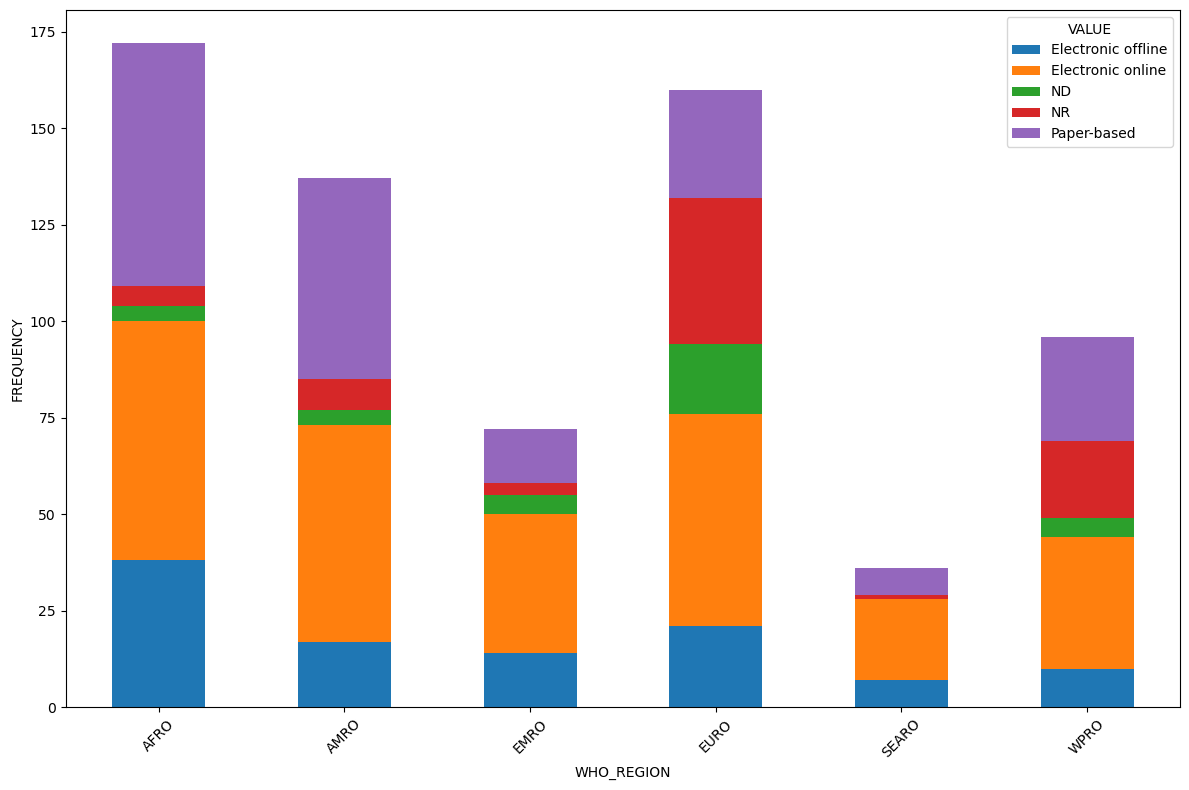

In [39]:
pivot_df3.plot(kind="bar",
               stacked=True, figsize=(12,8)) 
plt.xlabel("WHO_REGION") 
plt.ylabel("FREQUENCY") 
plt.legend(title="VALUE") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

The inventory management system available at various storage points are the Electronic online, Electronic offline, 
Paper based as well as not described and not recorded inputs. 
The most popular inventory management systems among all regions are the Electronic online and Paper based inventory system.

**2. What are the wastage rates of vaccines due to expiry or improper storage?**

In [40]:
query = """ 
SELECT YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE, count(*) as FREQUENCY 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%wastage rate%" 
GROUP BY YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
wastage = %sql $query 
wastage

 * sqlite:///vaccine_logistics.db
Done.


[(2022.0, 'Afghanistan', 'EMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Albania', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', None, 1),
 (2022.0, 'Algeria', 'AFRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Andorra', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Angola', 'AFRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Anguilla', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Antigua and Barbuda', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Argentina', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Armenia', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Aruba', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Australia', 'WPRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Austria', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Azerbaijan', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Bahamas', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', None, 1),
 (2022.0, 'Bahrain', 'EMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'NR', 1),
 (2022.0, 'Bangladesh', 'SEARO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0.95', 1),
 (2022.0, 'Barbados', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Belarus', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '1.2', 1),
 (2022.0, 'Belgium', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Belize', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0.92', 1),
 (2022.0, 'Benin', 'AFRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Bermuda', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Bhutan', 'SEARO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Bolivia (Plurinational State of)', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0.5', 1),
 (2022.0, 'Bosnia and Herzegovina', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '0', 1),
 (2022.0, 'Botswana', 'AFRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Brazil', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', None, 1),
 (2022.0, 'British Virgin Islands', 'AMRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '5', 1),
 (2022.0, 'Brunei Darussalam', 'WPRO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', '4', 1),
 (2022.0, 'Bulgaria', 'EURO', 'What is the closed-vial wastage rate for DTP-containing vaccine at the national level?', 'ND', 1),
 (2022.0, 'Burkina Faso', 'AFRO', 'What is the

In [41]:
df5 = pd.DataFrame(wastage) 
df5

0                                                  1     2  \
0    2022.0                                        Afghanistan  EMRO   
1    2022.0                                            Albania  EURO   
2    2022.0                                            Algeria  AFRO   
3    2022.0                                            Andorra  EURO   
4    2022.0                                             Angola  AFRO   
..      ...                                                ...   ...   
397  2023.0                                           Viet Nam  WPRO   
398  2023.0                                              Yemen  EMRO   
399  2023.0                                             Zambia  AFRO   
400  2023.0                                           Zimbabwe  AFRO   
401  2023.0  occupied Palestinian territory, including east...  EMRO   

                                                     3     4  5  
0    What is the closed-vial wastage rate for DTP-c...     0  1  
1    What is the closed-vial wastage rate for DTP-c...  None  1  
2    What is the closed-vial wastage rate for DTP-c...    ND  1  
3    What is the closed-vial wastage rate for DTP-c...    ND  1  
4    What is the closed-vial wastage rate for DTP-c...     0  1  
..                                                 ...   ... ..  
397  What is the closed-vial wastage rate for DTP-c...     3  1  
398  What is the closed-vial wastage rate for DTP-c...    ND  1  
399  What is the closed-vial wastage rate for DTP-c...     0  1  
400  What is the closed-vial wastage rate for DTP-c...  None  1  
401  What is the closed-vial wastage rate for DTP-c...     7  1  

[402 rows x 6 columns]

In [42]:
df5.columns = ["YEAR", "COUNTRYNAME", "WHO_REGION", "DESCRIPTION", "VALUE", "FREQUENCY"]

In [43]:
df5.head()

YEAR  COUNTRYNAME WHO_REGION  \
0  2022.0  Afghanistan       EMRO   
1  2022.0      Albania       EURO   
2  2022.0      Algeria       AFRO   
3  2022.0      Andorra       EURO   
4  2022.0       Angola       AFRO   

                                         DESCRIPTION VALUE  FREQUENCY  
0  What is the closed-vial wastage rate for DTP-c...     0          1  
1  What is the closed-vial wastage rate for DTP-c...  None          1  
2  What is the closed-vial wastage rate for DTP-c...    ND          1  
3  What is the closed-vial wastage rate for DTP-c...    ND          1  
4  What is the closed-vial wastage rate for DTP-c...     0          1

In [44]:
import seaborn as sns 
import numpy as np

In [45]:
print(df5)

       YEAR                                        COUNTRYNAME WHO_REGION  \
0    2022.0                                        Afghanistan       EMRO   
1    2022.0                                            Albania       EURO   
2    2022.0                                            Algeria       AFRO   
3    2022.0                                            Andorra       EURO   
4    2022.0                                             Angola       AFRO   
..      ...                                                ...        ...   
397  2023.0                                           Viet Nam       WPRO   
398  2023.0                                              Yemen       EMRO   
399  2023.0                                             Zambia       AFRO   
400  2023.0                                           Zimbabwe       AFRO   
401  2023.0  occupied Palestinian territory, including east...       EMRO   

                                           DESCRIPTION VALUE  FREQUENCY  
0

In [46]:
df5["YEAR"] = df5["YEAR"].astype(int)

In [47]:
pivot_df5 = df5.pivot_table(index="WHO_REGION", 
                            columns="YEAR", 
                            values="FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df5)

YEAR        2022  2023
WHO_REGION            
AFRO          46    46
AMRO          42    41
EMRO          20    21
EURO          53    46
SEARO         11    10
WPRO          33    33


In [48]:
pivot_df5.columns = pivot_df5.columns.map(str)

In [49]:
pivot_df5.reset_index(inplace=True) 
print(pivot_df5)

YEAR WHO_REGION  2022  2023
0          AFRO    46    46
1          AMRO    42    41
2          EMRO    20    21
3          EURO    53    46
4         SEARO    11    10
5          WPRO    33    33


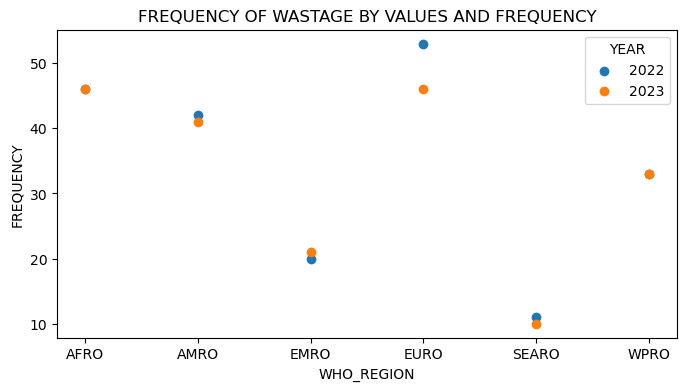

In [50]:
fig, ax = plt.subplots(figsize=(8, 4)) 
for year in pivot_df5.columns[1:]: 
    ax.scatter(pivot_df5["WHO_REGION"], pivot_df5[year], label=year)
plt.title("FREQUENCY OF WASTAGE BY VALUES AND FREQUENCY") 
plt.xlabel("WHO_REGION") 
plt.ylabel("FREQUENCY") 
plt.legend(title="YEAR") 
plt.show()

The query shows wastage of vaccines for 2022 and 2023, with the most wastage rate being for 2023.

**3. How often do storage points experience stock-outs?**

In [51]:
query = """ 
SELECT YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE, count(*) as Frequency 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%vaccine stock-out%" 
GROUP BY YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
stock_out = %sql $query 
stock_out

 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of BCG (Baccille Calmette Guérin) vaccine?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of DTP containing vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Haemophilus influenzae type B (hib) monovalent vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Hepatitis B monovalent vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Human Papillomavirus Virus (HPV) vaccines?', None, 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of IPV (Inactivated polio vaccine)?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Measles containing vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Meningococcal meningitis vaccines (all strains)?', None, 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of OPV (Oral polio vaccine)?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Pneumococcal conjugate vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Rotavirus vaccine?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of TT / DT / Td containing vaccines?', 'No', 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Typhoid vaccine?', None, 1),
 (2019.0, 'Afghanistan', 'EMRO', 'Was there a vaccine stock-out at the district level of Yellow fever vaccine?', None, 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of BCG (Baccille Calmette Guérin) vaccine?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of DTP containing vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Haemophilus influenzae type B (hib) monovalent vaccines?', None, 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Hepatitis B monovalent vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Human Papillomavirus Virus (HPV) vaccines?', None, 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of IPV (Inactivated polio vaccine)?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Measles containing vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Meningococcal meningitis vaccines (all strains)?', None, 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of OPV (Oral polio vaccine)?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Pneumococcal conjugate vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Rotavirus vaccine?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of TT / DT / Td containing vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Typhoid vaccine?', None, 1),
 (2019.0, 'Albania', 'EURO', 'Was there a vaccine stock-out at the district level of Yellow fever vaccine?', None, 1),
 (2019.0, 'Andorra', 'EURO', 'Was there a vaccine stock-out at the district level of BCG (Baccille Calmette Guérin) vaccine?', None, 1),
 (2019.0, 'Andorra', 'EURO', 'Was there a vaccine stock-out at the district level of DTP containing vaccines?', None, 1),
 (2019.0, 'Andorra', 'EURO', 'Was there a vaccine

In [52]:
df4 = pd.DataFrame(stock_out) 
df4

0                                                  1     2  \
0      2019.0                                        Afghanistan  EMRO   
1      2019.0                                        Afghanistan  EMRO   
2      2019.0                                        Afghanistan  EMRO   
3      2019.0                                        Afghanistan  EMRO   
4      2019.0                                        Afghanistan  EMRO   
...       ...                                                ...   ...   
12247  2023.0                                             Zambia  AFRO   
12248  2023.0                                             Zambia  AFRO   
12249  2023.0                                             Zambia  AFRO   
12250  2023.0                                           Zimbabwe  AFRO   
12251  2023.0  occupied Palestinian territory, including east...  EMRO   

                                                       3     4  5  
0      Was there a vaccine stock-out at the district ...    No  1  
1      Was there a vaccine stock-out at the district ...    No  1  
2      Was there a vaccine stock-out at the district ...    No  1  
3      Was there a vaccine stock-out at the district ...    No  1  
4      Was there a vaccine stock-out at the district ...  None  1  
...                                                  ...   ... ..  
12247  Was there a vaccine stock-out at the district ...    No  1  
12248  Was there a vaccine stock-out at the district ...    No  1  
12249                     Was there a vaccine stock-out?   Yes  1  
12250                     Was there a vaccine stock-out?  None  1  
12251                     Was there a vaccine stock-out?    No  1  

[12252 rows x 6 columns]

In [53]:
df4.columns = ["YEAR", "COUNTRY", "WHO_REGION", "DESCRIPTION", "VALUE", "FREQUENCY"]

In [54]:
df4.head()

YEAR      COUNTRY WHO_REGION  \
0  2019.0  Afghanistan       EMRO   
1  2019.0  Afghanistan       EMRO   
2  2019.0  Afghanistan       EMRO   
3  2019.0  Afghanistan       EMRO   
4  2019.0  Afghanistan       EMRO   

                                         DESCRIPTION VALUE  FREQUENCY  
0  Was there a vaccine stock-out at the district ...    No          1  
1  Was there a vaccine stock-out at the district ...    No          1  
2  Was there a vaccine stock-out at the district ...    No          1  
3  Was there a vaccine stock-out at the district ...    No          1  
4  Was there a vaccine stock-out at the district ...  None          1

In [55]:
pivot_df4 = df4.pivot_table(index="WHO_REGION", 
                            columns = "VALUE", 
                            values = "FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df4)

VALUE        ND   NR   No  Yes
WHO_REGION                    
AFRO         92  780  832  502
AMRO         70  638  931  248
EMRO         58  147  377  109
EURO        168  627  937   73
SEARO        14  152  225   62
WPRO        180  244  452   91


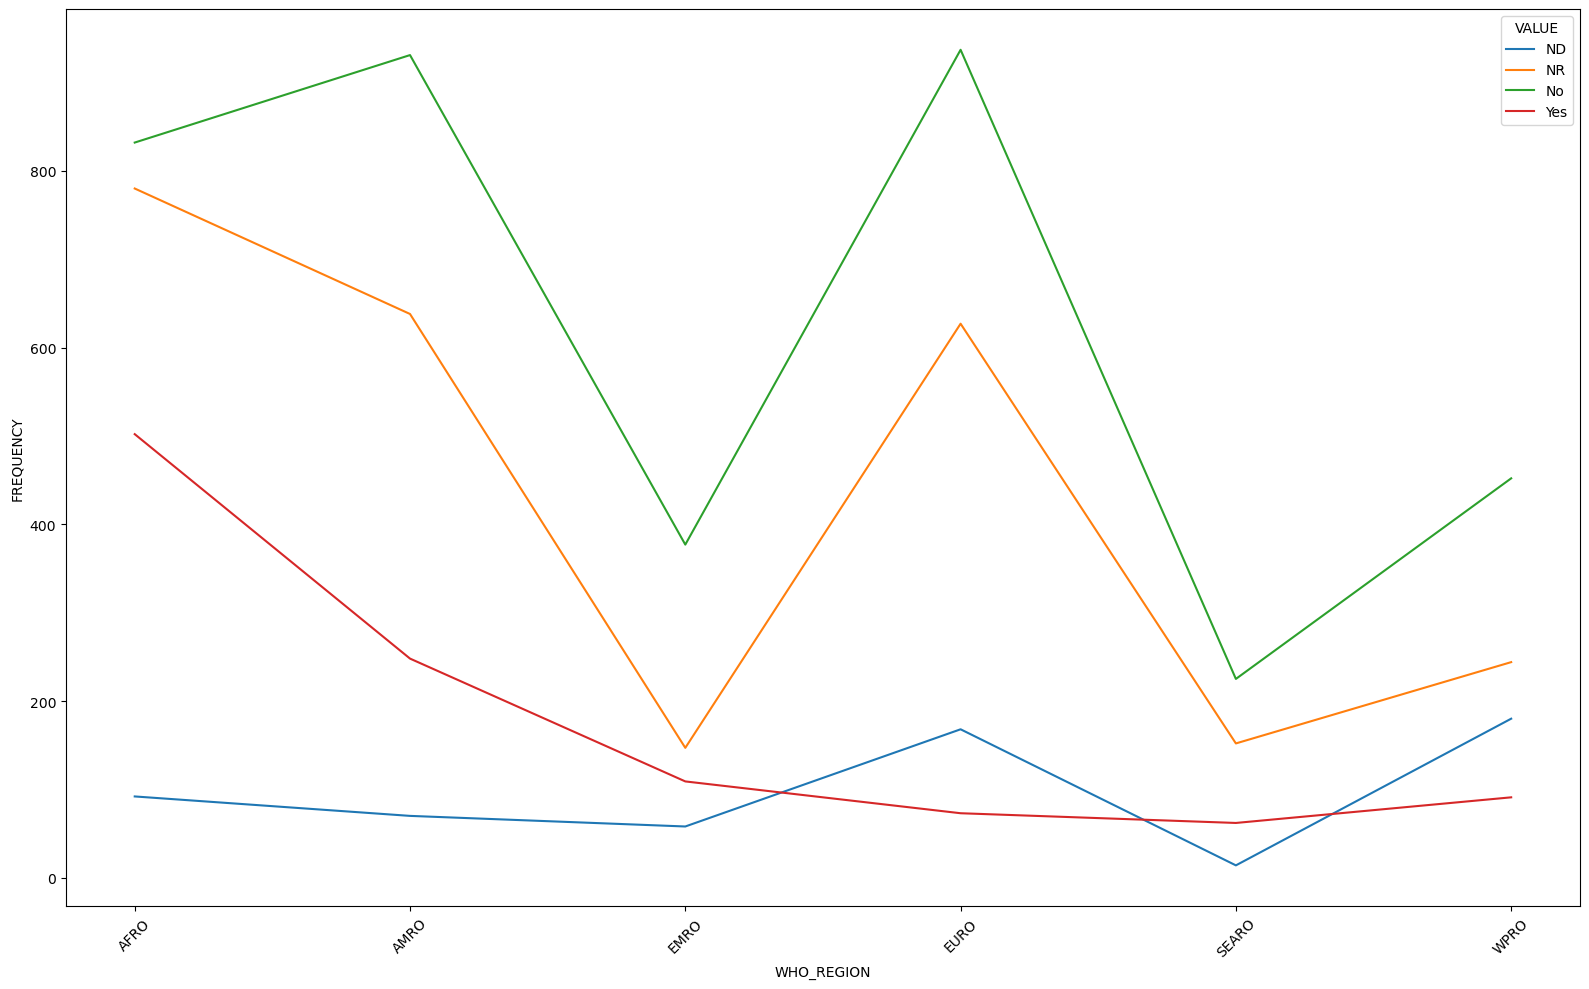

In [56]:
pivot_df4.plot(kind="line", 
               stacked=False, 
               figsize=(16, 10)) 
plt.xlabel("WHO_REGION")
plt.ylabel("FREQUENCY")
plt.legend(title="VALUE") 
plt.xticks(rotation = 45) 
plt.tight_layout() 
plt.show()

This query shows the trend in vaccine stock out. it shows that the African region has the 
most cases of vaccine stock out. 

### **DEMAND AND SUPPLY** 
**1. How does the supply of vaccines meet the demand in different regions?**

In [57]:
query = """ 
SELECT YEAR, WHO_REGION, DESCRIPTION, VALUE, count(*) as Frequency 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%duration of stock-out%" 
GROUP BY YEAR, WHO_REGION, DESCRIPTION, VALUE
ORDER BY YEAR; 
""" 
duration = %sql $query 
duration

 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', None, 27),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '.17', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '.5', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '0.36', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '1', 3),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '1.5', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '2', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '3', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', '5.3', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of BCG (Baccille Calmette Guérin) vaccine?', 'NR', 9),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', None, 32),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', '0', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', '1.13', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', '1.17', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', '3.7', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of DTP containing vaccines?', 'NR', 10),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Haemophilus influenzae type B (hib) monovalent vaccines?', None, 33),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Haemophilus influenzae type B (hib) monovalent vaccines?', '1.13', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Haemophilus influenzae type B (hib) monovalent vaccines?', '1.17', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Haemophilus influenzae type B (hib) monovalent vaccines?', 'ND', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Haemophilus influenzae type B (hib) monovalent vaccines?', 'NR', 10),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Hepatitis B monovalent vaccines?', None, 33),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Hepatitis B monovalent vaccines?', '1.17', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Hepatitis B monovalent vaccines?', '2', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Hepatitis B monovalent vaccines?', '2.5', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Hepatitis B monovalent vaccines?', 'NR', 10),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Human Papillomavirus Virus (HPV) vaccines?', None, 34),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Human Papillomavirus Virus (HPV) vaccines?', '6', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Human Papillomavirus Virus (HPV) vaccines?', 'ND', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of Human Papillomavirus Virus (HPV) vaccines?', 'NR', 10),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of IPV (Inactivated polio vaccine)?', None, 30),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of IPV (Inactivated polio vaccine)?', '.5', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of IPV (Inactivated polio vaccine)?', '.8', 1),
 (2019.0, 'AFRO', 'What was the duration of stock-out in months of IPV (Inactivated polio vaccine)?',

In [58]:
df6 = pd.DataFrame(duration) 
df6

0     1                                                  2     3  \
0     2019.0  AFRO  What was the duration of stock-out in months o...  None   
1     2019.0  AFRO  What was the duration of stock-out in months o...   .17   
2     2019.0  AFRO  What was the duration of stock-out in months o...    .5   
3     2019.0  AFRO  What was the duration of stock-out in months o...  0.36   
4     2019.0  AFRO  What was the duration of stock-out in months o...     1   
...      ...   ...                                                ...   ...   
1732  2023.0  WPRO  What was the duration of stock-out in months o...   1.5   
1733  2023.0  WPRO  What was the duration of stock-out in months o...  None   
1734  2023.0  WPRO  What was the duration of stock-out in months o...     4   
1735  2023.0  WPRO  What was the duration of stock-out in months o...    ND   
1736  2023.0  WPRO  What was the duration of stock-out in months o...    ND   

       4  
0     27  
1      1  
2      1  
3      1  
4      3  
...   ..  
1732   1  
1733   1  
1734   1  
1735   1  
1736   1  

[1737 rows x 5 columns]

In [59]:
df6.columns = ["YEAR", "WHO_REGION", "DESCRIPTION", "VALUE", "Frequency"]

In [60]:
df6.head()

YEAR WHO_REGION                                        DESCRIPTION VALUE  \
0  2019.0       AFRO  What was the duration of stock-out in months o...  None   
1  2019.0       AFRO  What was the duration of stock-out in months o...   .17   
2  2019.0       AFRO  What was the duration of stock-out in months o...    .5   
3  2019.0       AFRO  What was the duration of stock-out in months o...  0.36   
4  2019.0       AFRO  What was the duration of stock-out in months o...     1   

   Frequency  
0         27  
1          1  
2          1  
3          1  
4          3

In [61]:
df6["YEAR"] = df6["YEAR"].astype(int)

In [62]:
pivot_df6 = df6.pivot_table(index="WHO_REGION", 
                            columns="YEAR", 
                            values="Frequency", aggfunc="sum", fill_value=0) 
print(pivot_df6)

YEAR        2019  2020  2021  2022  2023
WHO_REGION                              
AFRO         644   602   639   641   111
AMRO         626   720   756   756    47
EMRO         280   266   280   280    30
EURO         644   754   756   740    17
SEARO        154   154   154   154    24
WPRO         462   406   420   461    36


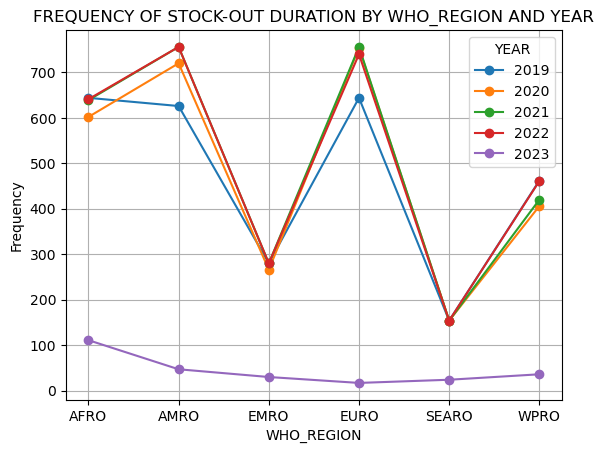

In [63]:
pivot_df6.plot(kind="line", 
               marker="o") 
plt.title("FREQUENCY OF STOCK-OUT DURATION BY WHO_REGION AND YEAR") 
plt.xlabel("WHO_REGION")
plt.ylabel("Frequency") 
plt.legend(title="YEAR") 
plt.grid(True) 
plt.show()

This query is best answered by the duration of stock-out which explains the duration between
demand and supply. The line plot clearly shows the trend of duration of vaccine stock out 
for the years in the dataset. 2023 shows a great improvement of meeting vaccine demand and supply.

**3. How accurate are the demand forecasts for vaccine?**

In [64]:
query = """  
SELECT YEAR, WHO_REGION, DESCRIPTION, VALUE, count(*) as FREQUENCY 
FROM LOGISTICS WHERE VALUE LIKE "%Inaccurate forecasts%" 
GROUP BY YEAR, WHO_REGION, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
forecasts = %sql $query 
forecasts

 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'AFRO', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Inaccurate forecasts', 1),
 (2019.0, 'AFRO', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Inaccurate forecasts', 1),
 (2019.0, 'AFRO', 'What was the cause of the national stock-out of Meningococcal meningitis vaccines (all strains)?', 'Inaccurate forecasts', 1),
 (2019.0, 'AMRO', 'What was the cause of the national stock-out of Auto-disable syringes?', 'Inaccurate forecasts', 1),
 (2019.0, 'AMRO', 'What was the cause of the national stock-out of DTP containing vaccines?', 'Inaccurate forecasts', 1),
 (2019.0, 'AMRO', 'What was the cause of the national stock-out of Hepatitis B monovalent vaccines?', 'Inaccurate forecasts', 1),
 (2019.0, 'AMRO', 'What was the cause of the national stock-out of Measles containing vaccines?', 'Inaccurate forecasts', 1),
 (2019.0, 'AMRO', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Inaccurate forecasts', 1),
 (2020.0, 'AMRO', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Inaccurate forecasts', 1),
 (2020.0, 'EURO', 'What was the cause of the national stock-out of Human Papillomavirus Virus (HPV) vaccines?', 'Inaccurate forecasts', 1),
 (2021.0, 'AFRO', 'What was the cause of the national stock-out of OPV (Oral polio vaccine)?', 'Inaccurate forecasts', 1),
 (2022.0, 'EURO', 'What was the cause of the national stock-out of IPV (Inactivated polio vaccine)?', 'Inaccurate forecasts', 1),
 (2022.0, 'EURO', 'What was the cause of the national stock-out of TT / DT / Td containing vaccines?', 'Inaccurate forecasts', 1),
 (2022.0, 'SEARO', 'What was the cause of the national stock-out of Hepatitis B containing vaccines?', 'Inaccurate forecasts', 1),
 (2023.0, 'AFRO', 'What was the cause of the national stock-out of BCG (Baccille Calmette Guérin) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AFRO', 'What was the cause of the national stock-out of DTwP-Hib-HepB (Whole cell) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AFRO', 'What was the cause of the national stock-out of PCV-10 (Pneumococcal conjugate vaccine 10-valent) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AFRO', 'What was the cause of the national stock-out of YF (Yellow fever) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AMRO', 'What was the cause of the national stock-out of RV-5 (Rotavirus 5-valent) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AMRO', 'What was the cause of the national stock-out of Tdap (Tetanus, diphtheria for older children and adults and acellular pertussis) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'AMRO', 'What was the cause of the national stock-out of YF (Yellow fever) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'EURO', 'What was the cause of the national stock-out of Meningococcal ACYW conjugate vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'EURO', 'What was the cause of the national stock-out of PCV-15 (Pneumococcal conjugate vaccine 15-valent) vaccine?', 'Inaccurate forecasts', 1),
 (2023.0, 'EURO', 'What was the cause of the national stock-out of Tdap (Tetanus, diphtheria for older children and adults and acellular pertussis) vaccine?', 'Inaccurate forecasts', 1)]

In [65]:
df7 = pd.DataFrame(forecasts) 
df7

0      1                                                  2  \
0   2019.0   AFRO  What was the cause of the national stock-out o...   
1   2019.0   AFRO  What was the cause of the national stock-out o...   
2   2019.0   AFRO  What was the cause of the national stock-out o...   
3   2019.0   AMRO  What was the cause of the national stock-out o...   
4   2019.0   AMRO  What was the cause of the national stock-out o...   
5   2019.0   AMRO  What was the cause of the national stock-out o...   
6   2019.0   AMRO  What was the cause of the national stock-out o...   
7   2019.0   AMRO  What was the cause of the national stock-out o...   
8   2020.0   AMRO  What was the cause of the national stock-out o...   
9   2020.0   EURO  What was the cause of the national stock-out o...   
10  2021.0   AFRO  What was the cause of the national stock-out o...   
11  2022.0   EURO  What was the cause of the national stock-out o...   
12  2022.0   EURO  What was the cause of the national stock-out o...   
13  2022.0  SEARO  What was the cause of the national stock-out o...   
14  2023.0   AFRO  What was the cause of the national stock-out o...   
15  2023.0   AFRO  What was the cause of the national stock-out o...   
16  2023.0   AFRO  What was the cause of the national stock-out o...   
17  2023.0   AFRO  What was the cause of the national stock-out o...   
18  2023.0   AMRO  What was the cause of the national stock-out o...   
19  2023.0   AMRO  What was the cause of the national stock-out o...   
20  2023.0   AMRO  What was the cause of the national stock-out o...   
21  2023.0   EURO  What was the cause of the national stock-out o...   
22  2023.0   EURO  What was the cause of the national stock-out o...   
23  2023.0   EURO  What was the cause of the national stock-out o...   

                       3  4  
0   Inaccurate forecasts  1  
1   Inaccurate forecasts  1  
2   Inaccurate forecasts  1  
3   Inaccurate forecasts  1  
4   Inaccurate forecasts  1  
5   Inaccurate forecasts  1  
6   Inaccurate forecasts  1  
7   Inaccurate forecasts  1  
8   Inaccurate forecasts  1  
9   Inaccurate forecasts  1  
10  Inaccurate forecasts  1  
11  Inaccurate forecasts  1  
12  Inaccurate forecasts  1  
13  Inaccurate forecasts  1  
14  Inaccurate forecasts  1  
15  Inaccurate forecasts  1  
16  Inaccurate forecasts  1  
17  Inaccurate forecasts  1  
18  Inaccurate forecasts  1  
19  Inaccurate forecasts  1  
20  Inaccurate forecasts  1  
21  Inaccurate forecasts  1  
22  Inaccurate forecasts  1  
23  Inaccurate forecasts  1

In [66]:
df7.columns = ["YEAR", "WHO_REGION", "DESCRIPTION", "VALUE", "FREQUENCY"]

In [67]:
df7["YEAR"] = df7["YEAR"].astype(int)

In [68]:
pivot_df7 = df7.pivot_table(index="WHO_REGION", 
                            columns="YEAR", 
                            values="FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df7)

YEAR        2019  2020  2021  2022  2023
WHO_REGION                              
AFRO           3     0     1     0     4
AMRO           5     1     0     0     3
EURO           0     1     0     2     3
SEARO          0     0     0     1     0


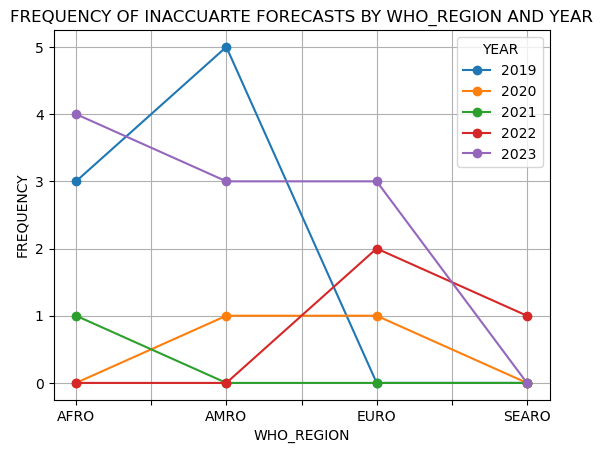

In [69]:
pivot_df7.plot(kind="line", 
               marker="o") 
plt.title("FREQUENCY OF INACCUARTE FORECASTS BY WHO_REGION AND YEAR") 
plt.xlabel("WHO_REGION") 
plt.ylabel("FREQUENCY") 
plt.legend(title="YEAR") 
plt.grid(True) 
plt.show()

Inaccurate forecasts as a cause for vaccine stock out means that the predictions regarding the demand for 
vaccines were significantly off the mark, leading to an imbalance between supply and demand. 
2019 shows an increase in inaccurate forecasts in the African and American regions and a sharp decline 
in the European regions. 

2020-2022 shows low rate of inaccurate forecasts and 2023 records a notable increase in inaccurate forecasts 
through the regions.


### **COLD CHAIN MANAGEMENT** 
**How effective is the cold chain in maintaining vaccine potency, Are there any breaches 
in the cold chain?**

In [70]:
query = """ 
SELECT YEAR, WHO_REGION, DESCRIPTION, VALUE, count(*) as FREQUENCY 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%cold chain equipment%" 
GROUP BY YEAR, WHO_REGION, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
cold_chain = %sql $query 
cold_chain

 * sqlite:///vaccine_logistics.db
Done.


[(2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', None, 4),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0', 6),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '10', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '100', 2),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '11.4', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '18.16', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '19', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '2', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '26', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '3.64', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '4', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '5', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '5.8', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '60', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '66.5', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '7', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '80', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '95.5', 1),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', 'ND', 18),
 (2023.0, 'AFRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', 'NR', 1),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', None, 8),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0', 9),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0.03', 1),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0.07', 1),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0.1', 1),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '0.66', 1),
 (2023.0, 'AMRO', 'What percentage of cold chain equipment used to store vaccines at 2-8°C has reported one or more temperature alarm?', '1', 1),
 (2023.0, 'AMRO',

In [71]:
df8 = pd.DataFrame(cold_chain) 
df8

0     1                                                  2     3   4
0   2023.0  AFRO  What percentage of cold chain equipment used t...  None   4
1   2023.0  AFRO  What percentage of cold chain equipment used t...     0   6
2   2023.0  AFRO  What percentage of cold chain equipment used t...    10   1
3   2023.0  AFRO  What percentage of cold chain equipment used t...   100   2
4   2023.0  AFRO  What percentage of cold chain equipment used t...  11.4   1
..     ...   ...                                                ...   ...  ..
67  2023.0  WPRO  What percentage of cold chain equipment used t...     4   1
68  2023.0  WPRO  What percentage of cold chain equipment used t...    53   1
69  2023.0  WPRO  What percentage of cold chain equipment used t...    90   1
70  2023.0  WPRO  What percentage of cold chain equipment used t...    ND  10
71  2023.0  WPRO  What percentage of cold chain equipment used t...    NR   1

[72 rows x 5 columns]

In [72]:
df8.columns = ["YEAR", "WHO_REGION", "DESCRIPTION", "VALUE", "FREQUENCY"]

In [73]:
df8["YEAR"] = df8["YEAR"].astype(int)

In [74]:
pivot_df8 = df8.pivot_table(index="WHO_REGION", 
                            columns="YEAR", 
                            values="FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df8)

YEAR        2023
WHO_REGION      
AFRO          46
AMRO          41
EMRO          21
EURO          46
SEARO         10
WPRO          33


In [75]:
pivot_df8.columns = pivot_df8.columns.map(str)

In [76]:
pivot_df8.reset_index(inplace=True) 

In [77]:
print(pivot_df8)

YEAR WHO_REGION  2023
0          AFRO    46
1          AMRO    41
2          EMRO    21
3          EURO    46
4         SEARO    10
5          WPRO    33


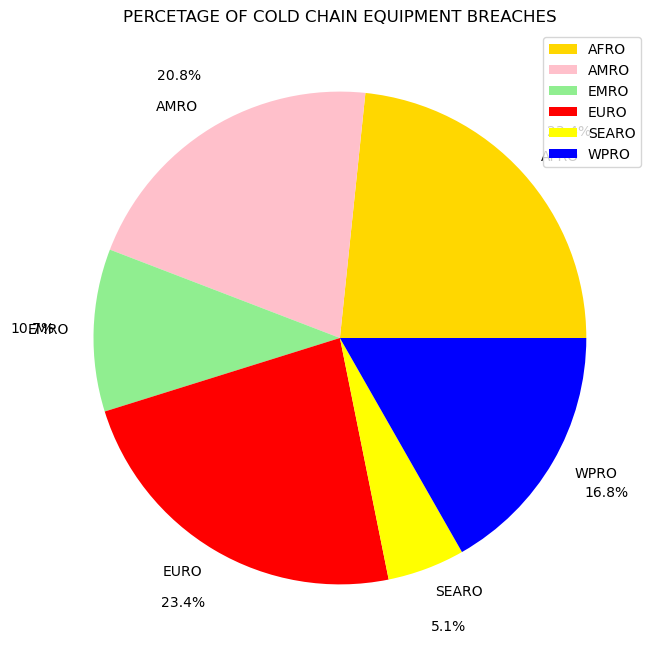

In [78]:
regions = pivot_df8["WHO_REGION"] 
frequencies = pivot_df8["2023"]
fig, ax = plt.subplots(figsize=(16,8)) 
ax.pie(frequencies, labels=regions, colors = ["gold", "pink", "lightgreen", "red", "yellow", "blue"], 
           autopct="%1.1f%%", pctdistance=1.25) 
ax.set_aspect("equal")
plt.title("PERCETAGE OF COLD CHAIN EQUIPMENT BREACHES") 
plt.legend(loc="upper right")
plt.show()

The pie chart shows the percentage of cold chain equipments used to store vaccine that have reported 
Temperature breaches. The numbers are quite low across regions which suggests the effectiveness of cold chain 
storage facilities across regions.

### **POLICY AND GOVERNANCE** 
**Is there a formal policy recommending the cold chain storage and transportation?**

In [79]:
query = """ 
SELECT YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE, count(*) as FREQUENCY 
FROM LOGISTICS WHERE DESCRIPTION LIKE "%cold chain storage%" 
GROUP BY YEAR, COUNTRYNAME, WHO_REGION, DESCRIPTION, VALUE 
ORDER BY YEAR; 
""" 
cold_chain_policy = %sql $query 
cold_chain_policy

 * sqlite:///vaccine_logistics.db
Done.


[(2019.0, 'Afghanistan', 'EMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Albania', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Andorra', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'ND', 1),
 (2019.0, 'Angola', 'AFRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Anguilla', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Antigua and Barbuda', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Argentina', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Armenia', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Aruba', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Australia', 'WPRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', None, 1),
 (2019.0, 'Austria', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', None, 1),
 (2019.0, 'Azerbaijan', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Bahamas', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Bahrain', 'EMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Bangladesh', 'SEARO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Barbados', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Belarus', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Belgium', 'EURO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Belize', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Benin', 'AFRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'No', 1),
 (2019.0, 'Bermuda', 'AMRO', 'Is there a formal policy recommending the cold chain storage and/or transportation of other temperature-sensitive pharmaceuticals with vaccines?', 'Yes', 1),
 (2019.0, 'Bhutan', 'SEARO', 'Is there 

In [80]:
df9 = pd.DataFrame(cold_chain_policy) 
df9

0                                                  1     2  \
0    2019.0                                        Afghanistan  EMRO   
1    2019.0                                            Albania  EURO   
2    2019.0                                            Andorra  EURO   
3    2019.0                                             Angola  AFRO   
4    2019.0                                           Anguilla  AMRO   
..      ...                                                ...   ...   
995  2023.0                                           Viet Nam  WPRO   
996  2023.0                                              Yemen  EMRO   
997  2023.0                                             Zambia  AFRO   
998  2023.0                                           Zimbabwe  AFRO   
999  2023.0  occupied Palestinian territory, including east...  EMRO   

                                                     3     4  5  
0    Is there a formal policy recommending the cold...    No  1  
1    Is there a formal policy recommending the cold...   Yes  1  
2    Is there a formal policy recommending the cold...    ND  1  
3    Is there a formal policy recommending the cold...   Yes  1  
4    Is there a formal policy recommending the cold...   Yes  1  
..                                                 ...   ... ..  
995  Is there a formal policy recommending the cold...   Yes  1  
996  Is there a formal policy recommending the cold...   Yes  1  
997  Is there a formal policy recommending the cold...   Yes  1  
998  Is there a formal policy recommending the cold...  None  1  
999  Is there a formal policy recommending the cold...   Yes  1  

[1000 rows x 6 columns]

In [81]:
df9.columns = ["YEAR", "COUNTRYNAME", "WHO-REGION", "DESCRIPTION", "VALUE", "FREQUENCY"]

In [82]:
df9.head()

YEAR  COUNTRYNAME WHO-REGION  \
0  2019.0  Afghanistan       EMRO   
1  2019.0      Albania       EURO   
2  2019.0      Andorra       EURO   
3  2019.0       Angola       AFRO   
4  2019.0     Anguilla       AMRO   

                                         DESCRIPTION VALUE  FREQUENCY  
0  Is there a formal policy recommending the cold...    No          1  
1  Is there a formal policy recommending the cold...   Yes          1  
2  Is there a formal policy recommending the cold...    ND          1  
3  Is there a formal policy recommending the cold...   Yes          1  
4  Is there a formal policy recommending the cold...   Yes          1

In [83]:
df9["YEAR"] = df9["YEAR"].astype(int)

In [84]:
pivot_df9 = df9.pivot_table(index="YEAR", 
                            columns="VALUE", 
                            values="FREQUENCY", aggfunc="sum", fill_value=0) 
print(pivot_df9)

VALUE  ND  NR  No  Yes
YEAR                  
2019    2   0  57  128
2020    1   2  41  133
2021    3   0  33  139
2022    3   1  32  149
2023    3   1  23  147


This output shows that across the regions, majority of the countries have a formal policy recommending the
cold chain storage and transportation.

This analysis shows the trend in vaccine supply and logistics from 2019 to 2023. The COVID-19 pandemic 
and associated disruptions as well as the WORLD HEALTH ORGANIZATION COVID-19 efforts strained the vaccine
supply and logistics system causing setbacks. 

+ Improvements can be made in the African region to reduce delays to vaccine availability as supply chain 
efficiency has an overall effect on public health outcomes.

+ Reduction un the rates of procurement and financial delays as they seem to be the major causes of vaccine stock out. 

+ Analysis shows that in 2023, WHO has done incredibly well to reduce the level of shortages or vaccine stock out within 
regions, which have also bridged the gap between demand and supply. 

+ Encourage the conversion of paper based inventory management systems to electronic based systems across regions. 

+ Further reduce the wastage rate of vaccines across regions. 


